# TESLA 9-cell Cavity



In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# locate the drift template
from impact import Impact, template_dir

ifile = os.path.join(template_dir, 'tesla_9cell_cavity/ImpactT.in')
os.path.exists(ifile)

True

In [3]:
# calculate gamma*beta
mec2 = 0.51099895000e6 # eV
Etot = 100e6 #eV
gamma = Etot/mec2
GB = np.sqrt(gamma**2 -1)
GB


195.69256334448912

# Use Impact's built-in Gaussian particle generator

In [4]:
I = Impact(ifile, verbose=False)
I.header['Np'] = 10000
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 32
I.header['Dt'] = 1e-12

#I.ele['cavity9']['rf_field_scale']= 32e6
#I.ele['cavity9']['theta0_deg'] =  29.37652048194741

I.total_charge = 0 # Turn SC off
I.verbose=False
print(I)
I.run()
I.particles['final_particles']['sigma_x']/1e-6


================ Impact-T Summary ================    
10000 particles
1 bunch of electrons
total charge: 0.0 pC
Distribution type: gauss3
Free space start
Processor domain: 1 x 1 = 1 CPUs
Space charge grid: 32 x 32 x 32
Maximum time steps: 1000000
Reference Frequency: 1300000000.0 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning
Impact-T configured in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp132rzkbn


9.201973219685676

In [5]:
I.lattice

[{'description': 'name:cavity9',
  'original': '1.347 0 0 112 0 32e6 1.3e9 29.37652048194741 9 0 0 0 0 0 0 /!name:cavity9 ',
  'L': 1.347,
  'type': 'emfield_cylindrical',
  'zedge': 0.0,
  'rf_field_scale': 32000000.0,
  'rf_frequency': 1300000000.0,
  'theta0_deg': 29.37652048194741,
  'filename': '1T9.T7',
  'radius': 0.0,
  's': 1.347,
  'name': 'cavity9'},
 {'type': 'comment',
  'description': '!1.347 0 0  105 0 32e6 1.3e9 230.61301861213167 3.0 0 0.0 0.0 0.0 0.0 0.0 0.0 /!name:cavity9_1d',
  'name': 'cavity9_1d'},
 {'description': 'name:stop_1',
  'original': '0 0 0 -99 0 0.0 1.5 /!name:stop_1',
  'type': 'stop',
  's': 1.5,
  'name': 'stop_1'}]

# Autophase

In [6]:
from impact.autophase import autophase

from pmd_beamphysics import single_particle

P0 = single_particle(pz=100e6, z=1e-15)

autophase(I, ele_name='cavity9', initial_particles=P0, metric='mean_kinetic_energy', verbose=True)

Copied initial Impact object. 
Phasing cavity9 by changing theta0_deg
Bounds: 0.0, 1.347 m
Default brent2 algorithm
Phase: 180, 84.35568509998183 MeV
Phase: 180, 84.35568509998183 MeV
Phase: 42.49224000000004, 116.40482618403738 MeV
Phase: 264.9844890561601, 89.68074259487963 MeV
Phase: 42.49224000000004, 116.40482618403738 MeV
Phase: 42.49223440298533, 116.4048265688159 MeV
Phase: 264.9844709438398, 89.68073806443564 MeV
Phase: 222.49223979316707, 82.57605636016723 MeV
Phase: 127.47670402554945, 97.04279832821194 MeV
Phase: 333.7383564618515, 109.29301577254951 MeV
Phase: 74.95341232683768, 111.64670559339784 MeV
Phase: 16.23059066132214, 116.40275724774435 MeV
Phase: 54.89130068984741, 115.16408328610474 MeV
Phase: 32.461179389557174, 116.83272119291648 MeV
Phase: 26.26164633538815, 116.83222786183394 MeV
Phase: 29.376523546721955, 116.85788572464793 MeV
Phase: 29.375414170188378, 116.85788572158197 MeV
Phase: 29.377632923255533, 116.85788572107096 MeV
Set Phase: 29.376523546721955


29.376523546721955

In [7]:
I.run()

In [8]:
I.particles['final_particles']['mean_energy']/1e6, I.particles['final_particles']['sigma_x']/1e-6

(117.36733607198737, 9.201973219575375)

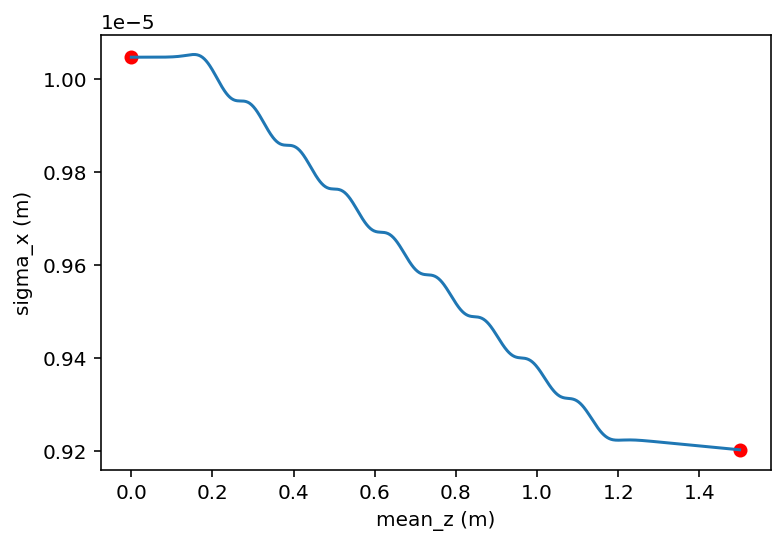

In [9]:
# Compare these. 
key1 = 'mean_z'
key2 = 'sigma_x'
units1 = str(I.units(key1))
units2 = str(I.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(I.stat(key1), I.stat(key2))
plt.scatter(
    [I.particles[name][key1] for name in I.particles], 
    [I.particles[name][key2] for name in I.particles], color='red')

In [10]:
I.output['stats'].keys()

dict_keys(['t', 'mean_z', 'moment4_x', 'moment4_y', 'moment4_z', 'mean_y', 'sigma_y', 'norm_emit_y', 'mean_x', 'sigma_x', 'norm_emit_x', 'sigma_z', 'norm_emit_z', 'loadbalance_min_n_particle', 'loadbalance_max_n_particle', 'n_particle', 'moment3_x', 'moment3_y', 'moment3_z', 'mean_gamma', 'mean_beta', 'max_r', 'sigma_gamma', 'max_amplitude_x', 'max_amplitude_y', 'max_amplitude_z', 'moment4_px', 'moment4_py', 'moment4_pz', 'mean_py', 'sigma_py', 'cov_y__py', 'mean_px', 'sigma_px', 'cov_x__px', 'mean_pz', 'sigma_pz', 'cov_z__pz', 'moment3_px', 'moment3_py', 'moment3_pz', 'mean_kinetic_energy', 'max_amplitude_px', 'max_amplitude_py', 'max_amplitude_pz'])

In [11]:
PI = I.particles['initial_particles']
PF = I.particles['final_particles']

In [12]:
PI['mean_pz']

99998694.39159244

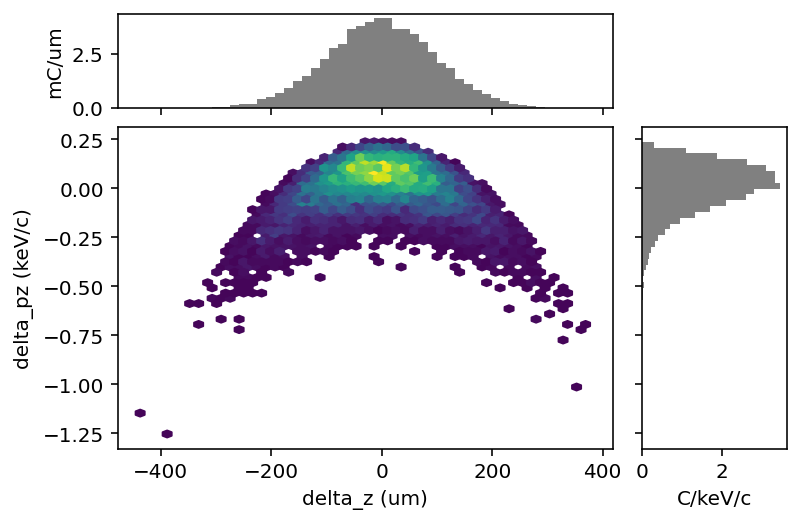

In [13]:
PF.plot('delta_z', 'delta_pz')

# Make particles in distgen

In [14]:
from distgen import Generator

YAML="""
n_particle: 10000
random_type: hammersley
start:
  tstart:
    units: sec
    value: 0
  type: time
total_charge:
  units: nC
  value: 1
r_dist:
  sigma_xy:
    units: mm
    value: .01
  type: radial_gaussian
z_dist:
  avg_z:
    units: mm
    value: 0
  sigma_z:
    units: mm
    value: 0.1
  type: gaussian
  

transforms:
  setPz:
    type: set_avg pz
    avg_pz: 
      value: 99.99869439159244
      units: MeV/c
  
"""
G = Generator(YAML)
G.run()
P = G.particles


In [15]:
I2 = I.copy()
I2.initial_particles = P
I2.configure()
I2.total_charge = 0 # or: P['charge']
I2.verbose = True
I2.run()
PF2 = I2.particles['final_particles']

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp0a2i14yz
writing 10000 particles to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp0a2i14yz/partcl.data
Normal start with at time 0.0 s
Normal start: Replaced Np with 10000 according to initial particles
Normal start: Replaced Tini with 0.0 according to initial particles
Normal start: Replaced Flagimg with 0 according to initial particles
Changing particle offset factor zmu2 to 0
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.0 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:            2           2
 pass setting up lattice...
 check randomness:            0  0.79479214134216858     
 avgpts, jlow, and jhigh:        10000           1       10000
 sumx1,sumy1:    1.0084096643651897E-020  -1.1744879271853201E-020
 pass generating initial distribution...

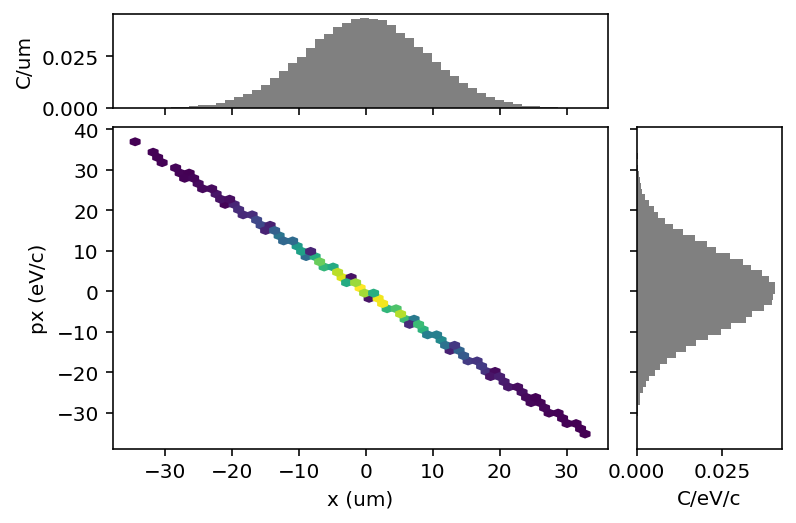

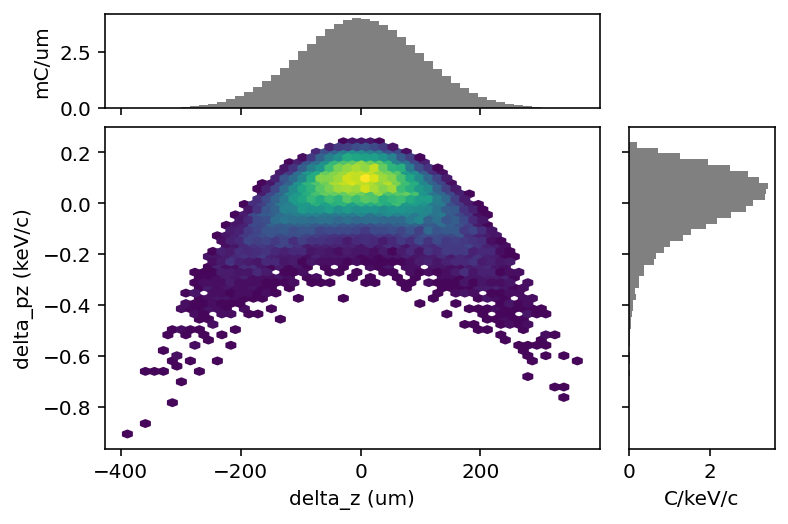

In [16]:
PF2.plot('x', 'px')
PF2.plot('delta_z', 'delta_pz')

# Compare

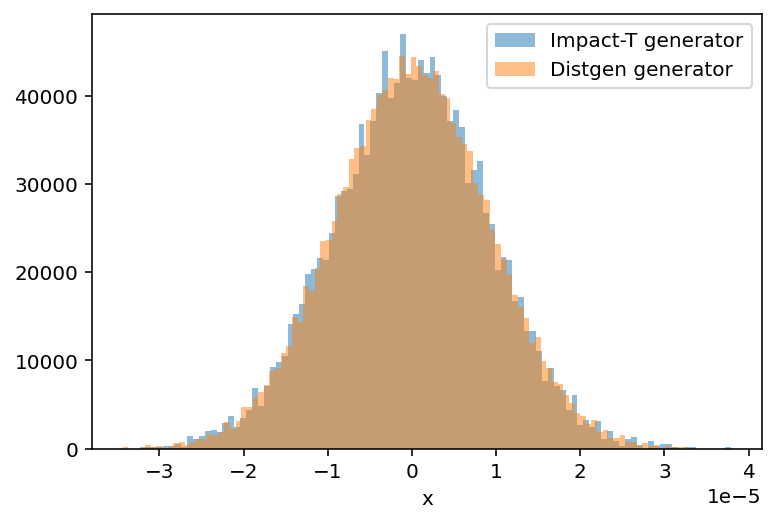

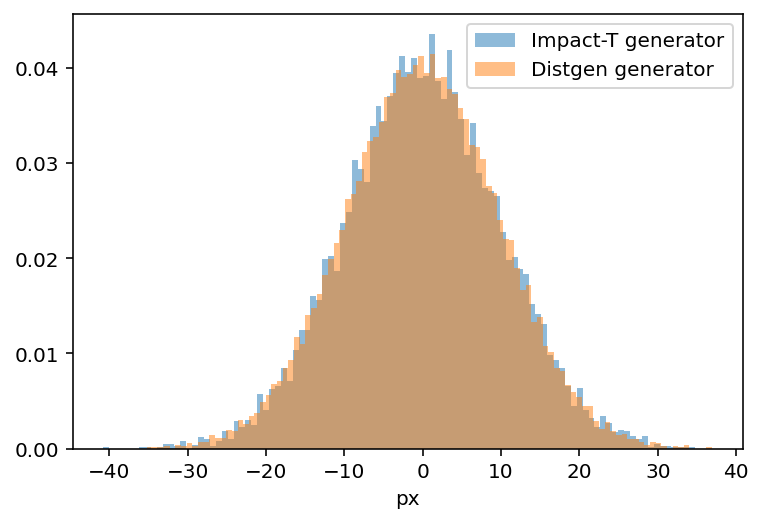

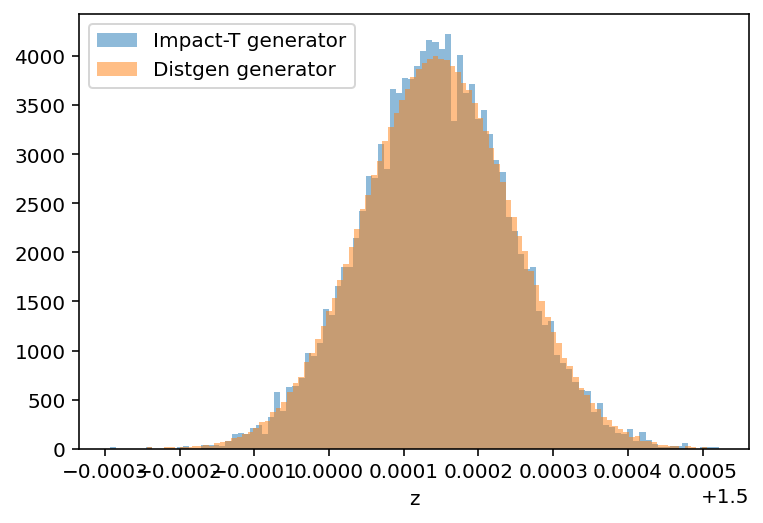

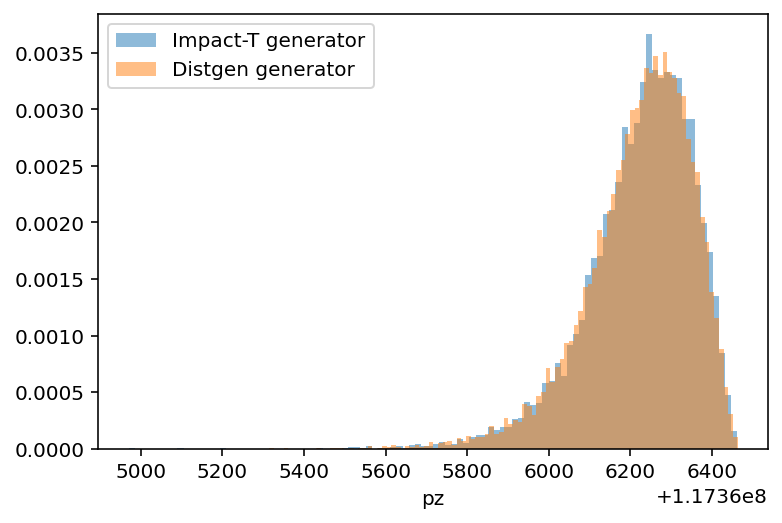

In [17]:
for k in ['x', 'px', 'z', 'pz']:
    plt.hist(PF[k], density=True, bins=100, label='Impact-T generator', alpha=0.5)
    plt.hist(PF2[k], density=True, bins=100, label='Distgen generator', alpha=0.5)
    plt.xlabel(k)
    plt.legend()
    plt.show()

In [18]:
#I2.archive('/Users/chrisonian/Scratch/impact_cavity9_SC_ON.h5')